This notebook explores avocado demand trends across regions over multiple years.
The goal is to understand demand patterns, distribution differences, and broad market shifts,
not to establish causal relationships or make forecasts.

In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [5]:
df = pd.read_csv(filepath_or_buffer='/home/dip__4/Documents/college/ai-sem-3/datasets/avocado.csv')

In [6]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
pd.options.display.float_format = '{:.0f}'.format

In [8]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1,64237,1037,54455,48,8697,8604,93,0,conventional,2015,Albany
1,1,2015-12-20,1,54877,674,44639,58,9506,9408,97,0,conventional,2015,Albany
2,2,2015-12-13,1,118220,795,109150,130,8145,8042,103,0,conventional,2015,Albany
3,3,2015-12-06,1,78992,1132,71976,73,5811,5677,134,0,conventional,2015,Albany
4,4,2015-11-29,1,51040,941,43838,76,6184,5986,198,0,conventional,2015,Albany


In [9]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,2,17075,2047,1529,0,13499,13067,432,0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,2,13888,1192,3432,0,9265,8940,325,0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,2,13767,1192,2453,728,9394,9352,42,0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,2,16205,1528,2981,727,10970,10920,50,0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,2,17490,2895,2356,225,12014,11988,26,0,organic,2018,WestTexNewMexico


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [11]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [12]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249,18249,18249,18249,18249,18249,18249,18249,18249,18249,18249
mean,24,1,850644,293008,295155,22840,239639,182195,54338,3106,2016
std,15,0,3453545,1264989,1204120,107464,986242,746179,243966,17693,1
min,0,0,85,0,0,0,0,0,0,0,2015
25%,10,1,10839,854,3009,0,5089,2849,127,0,2015
50%,24,1,107377,8645,29061,185,39744,26363,2648,0,2016
75%,38,2,432962,111020,150207,6243,110783,83338,22029,132,2017
max,52,3,62505647,22743616,20470573,2546439,19373134,13384587,5719097,551694,2018


In [13]:
df.iloc[:, 0].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [14]:
df.iloc[:, 0].nunique()

53

In [15]:
df['region'].value_counts()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [16]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [17]:
df.loc[:, 'type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [18]:
avocado_category = df.loc[:, ['4046', '4225', '4770']]

### For context:

#### 4046 → (total no of avacados) Hass, conventional

#### 4225 → (total no of avacados) Hass, organic

#### 4770 → (total no of avacados) Large green avocados (like Florida types)

In [19]:
reason_wise_type = df.drop(labels=['year', 'Date', 'Unnamed: 0'], axis=1)

In [20]:
groupby_reason_wise_and_type = reason_wise_type.groupby(
    ['region', 'type']
).agg(
    total_demand=('Total Volume', 'sum'),
    avg_price=('AveragePrice', 'mean'),
    small_bags=('Small Bags', 'sum'),
    large_bags=('Large Bags', 'sum'),
    xlarge_bags=('XLarge Bags', 'sum')
)

In [21]:
groupby_reason_wise_and_type.sort_values(by=['total_demand'], ascending=True, inplace=True)

In [22]:
groupby_reason_wise_and_type

,,total_demand,avg_price,small_bags,large_bags,xlarge_bags
region,type,,,,,
Albany,organic,367188,2,313893,102,0
Boise,organic,412647,2,59887,187646,92
Syracuse,organic,450675,2,296516,130322,0
Louisville,organic,492177,1,88034,194637,0
Jacksonville,organic,523971,2,199554,96898,0
...,...,...,...,...,...,...
Northeast,conventional,689054813,1,158896031,20708493,1309368
SouthCentral,conventional,993161155,1,174525116,44886295,2640111
California,conventional,1003596841,1,220811574,11757395,5272578


### Region-wise Market Insights (EDA)

- The data shows clear **regional differences in avocado market demand**, particularly in terms of **bag size preference** and **avocado category**.

- Across most regions, **X-Large avocado bags have very low demand**, indicating that consumers in these regions generally do not prefer purchasing avocados in large quantities.

- There is a **noticeable variation in average avocado prices across regions**, suggesting differences in regional pricing dynamics, supply conditions, or consumer purchasing behavior.

- **Conventional avocados are preferred over organic** in nearly all regions, making conventional the dominant category in the dataset.

- Regions such as **West and  California, SouthCentral exhibit the highest overall demand**, indicating stronger market activity compared to other regions.

- **Small-sized avocado bags are the most sold across regions**, making them the most preferred option. This may be due to factors such as **affordability, household consumption patterns, or reduced food waste**.

In [23]:
df.region.value_counts(ascending=True)

region
WestTexNewMexico       335
Albany                 338
BaltimoreWashington    338
Atlanta                338
Boston                 338
BuffaloRochester       338
California             338
Boise                  338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
Charlotte              338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
GreatLakes             338
Orlando                338
Philadelphia           338
Pittsburgh             338
PhoenixTucson          338
Portland             

#### the above group table is the perfect representation for the region based aggregation since all the classes are nearly perfectly balanced.

In [24]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1,64237,1037,54455,48,8697,8604,93,0,conventional,2015,Albany
1,1,2015-12-20,1,54877,674,44639,58,9506,9408,97,0,conventional,2015,Albany
2,2,2015-12-13,1,118220,795,109150,130,8145,8042,103,0,conventional,2015,Albany
3,3,2015-12-06,1,78992,1132,71976,73,5811,5677,134,0,conventional,2015,Albany
4,4,2015-11-29,1,51040,941,43838,76,6184,5986,198,0,conventional,2015,Albany


#### Now for the better version, lets check which category of the avacado is preferred mostly by the peoples per region.

In [25]:
avocado_type_per_region = df.groupby(['region']).agg(
    total_demand=('Total Volume', 'sum'),
    _4046= ('4046', 'sum'),
    _4225= ('4225', 'sum'),
    _4770= ('4770', 'sum')
)

In [26]:
avocado_type_per_region.sort_values(by=['total_demand'], ascending=False)

,total_demand,_4046,_4225,_4770
region,,,,
TotalUS,5864740182,2054936231,2015011555,156175183
West,1086779156,398590531,300758923,20356071
California,1028981653,398967013,351491402,31841046
SouthCentral,1011279619,535041387,220450006,22395794
Northeast,713280910,34991208,474484664,6816645
Southeast,615238409,339687093,90860436,3163231
GreatLakes,589642549,93717012,267257721,50075971
Midsouth,508349357,110430633,222373069,19031957
LosAngeles,507896548,223879363,102133960,13618694


### Important Vision:
1. the data is quite unusual, the consumption rate on west, california, southcentral region is quite suspicious over the 3 years of time.
2. the 4046 version of the avocado has dominated the market than other mostly due to the reasons like costfactors, tastes etc.

In [32]:
df_without_time_and_categorical_values = df.drop(['Date', 'year', 'type', 'region', 'Unnamed: 0'], axis=1)

In [33]:
df_without_time_and_categorical_values

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1,64237,1037,54455,48,8697,8604,93,0
1,1,54877,674,44639,58,9506,9408,97,0
2,1,118220,795,109150,130,8145,8042,103,0
3,1,78992,1132,71976,73,5811,5677,134,0
4,1,51040,941,43838,76,6184,5986,198,0
...,...,...,...,...,...,...,...,...,...
18244,2,17075,2047,1529,0,13499,13067,432,0
18245,2,13888,1192,3432,0,9265,8940,325,0
18246,2,13767,1192,2453,728,9394,9352,42,0
18247,2,16205,1528,2981,727,10970,10920,50,0


In [34]:

df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1,64237,1037,54455,48,8697,8604,93,0,conventional,2015,Albany
1,1,2015-12-20,1,54877,674,44639,58,9506,9408,97,0,conventional,2015,Albany
2,2,2015-12-13,1,118220,795,109150,130,8145,8042,103,0,conventional,2015,Albany
3,3,2015-12-06,1,78992,1132,71976,73,5811,5677,134,0,conventional,2015,Albany
4,4,2015-11-29,1,51040,941,43838,76,6184,5986,198,0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,2,17075,2047,1529,0,13499,13067,432,0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,2,13888,1192,3432,0,9265,8940,325,0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,2,13767,1192,2453,728,9394,9352,42,0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,2,16205,1528,2981,727,10970,10920,50,0,organic,2018,WestTexNewMexico


### Why doesn’t Total Volume exactly match the sum of avocado types and Total Bags with the Bag sizes?

When we compare the **Total Volume** with the sum of the three avocado types (4046, 4225, and 4770), they are very close but not always exactly equal. This can happen for a few simple reasons:

1. **Not all avocados may be listed by type**
   The dataset might include some avocado sales that don’t fall under these three labels. Those extra sales would still be counted in the Total Volume but wouldn’t appear when we add the three types together.

2. **Rounding during data collection**
   Sales numbers are often rounded at different stages (for example, weekly or regional reporting). When many rounded numbers are added together, small differences can show up in the final totals.

3. **Data may come from different sources**
   The Total Volume and the type-wise volumes might have been collected or calculated separately. Small differences in how the data was recorded or combined can lead to slight mismatches.

Overall, these small differences are normal in real-world market data and do not indicate a problem with the dataset.

In [36]:
df.groupby(by=['type']).agg(
    total_demand=('Total Volume', 'sum'),
)

,total_demand
type,
conventional,15087220911
organic,436181682


### Preference between conventional and organic avocados

Another clear pattern in the data is a strong preference for **conventional avocados** over **organic avocados**.

The total demand for conventional avocados is significantly higher than that of organic avocados. This suggests that most consumers tend to choose conventional avocados, likely due to factors such as lower price, wider availability, or familiarity.

While organic avocados are still purchased in large quantities, they represent a much smaller share of overall demand compared to conventional ones.

In [38]:
demands_per_year=df.groupby(by=['year']).agg(
    total_demand=('Total Volume', 'sum'),
)

In [51]:
average_price_per_year = df.groupby(by=['year']).agg(
    Average_price=('AveragePrice', 'mean'),
)

In [40]:
demands_per_year

,total_demand
year,
2015,4385468662
2016,4820889892
2017,4934305699
2018,1382738340


In [55]:
average_price_per_year

,Average_price
year,
2015,1
2016,1
2017,2
2018,1


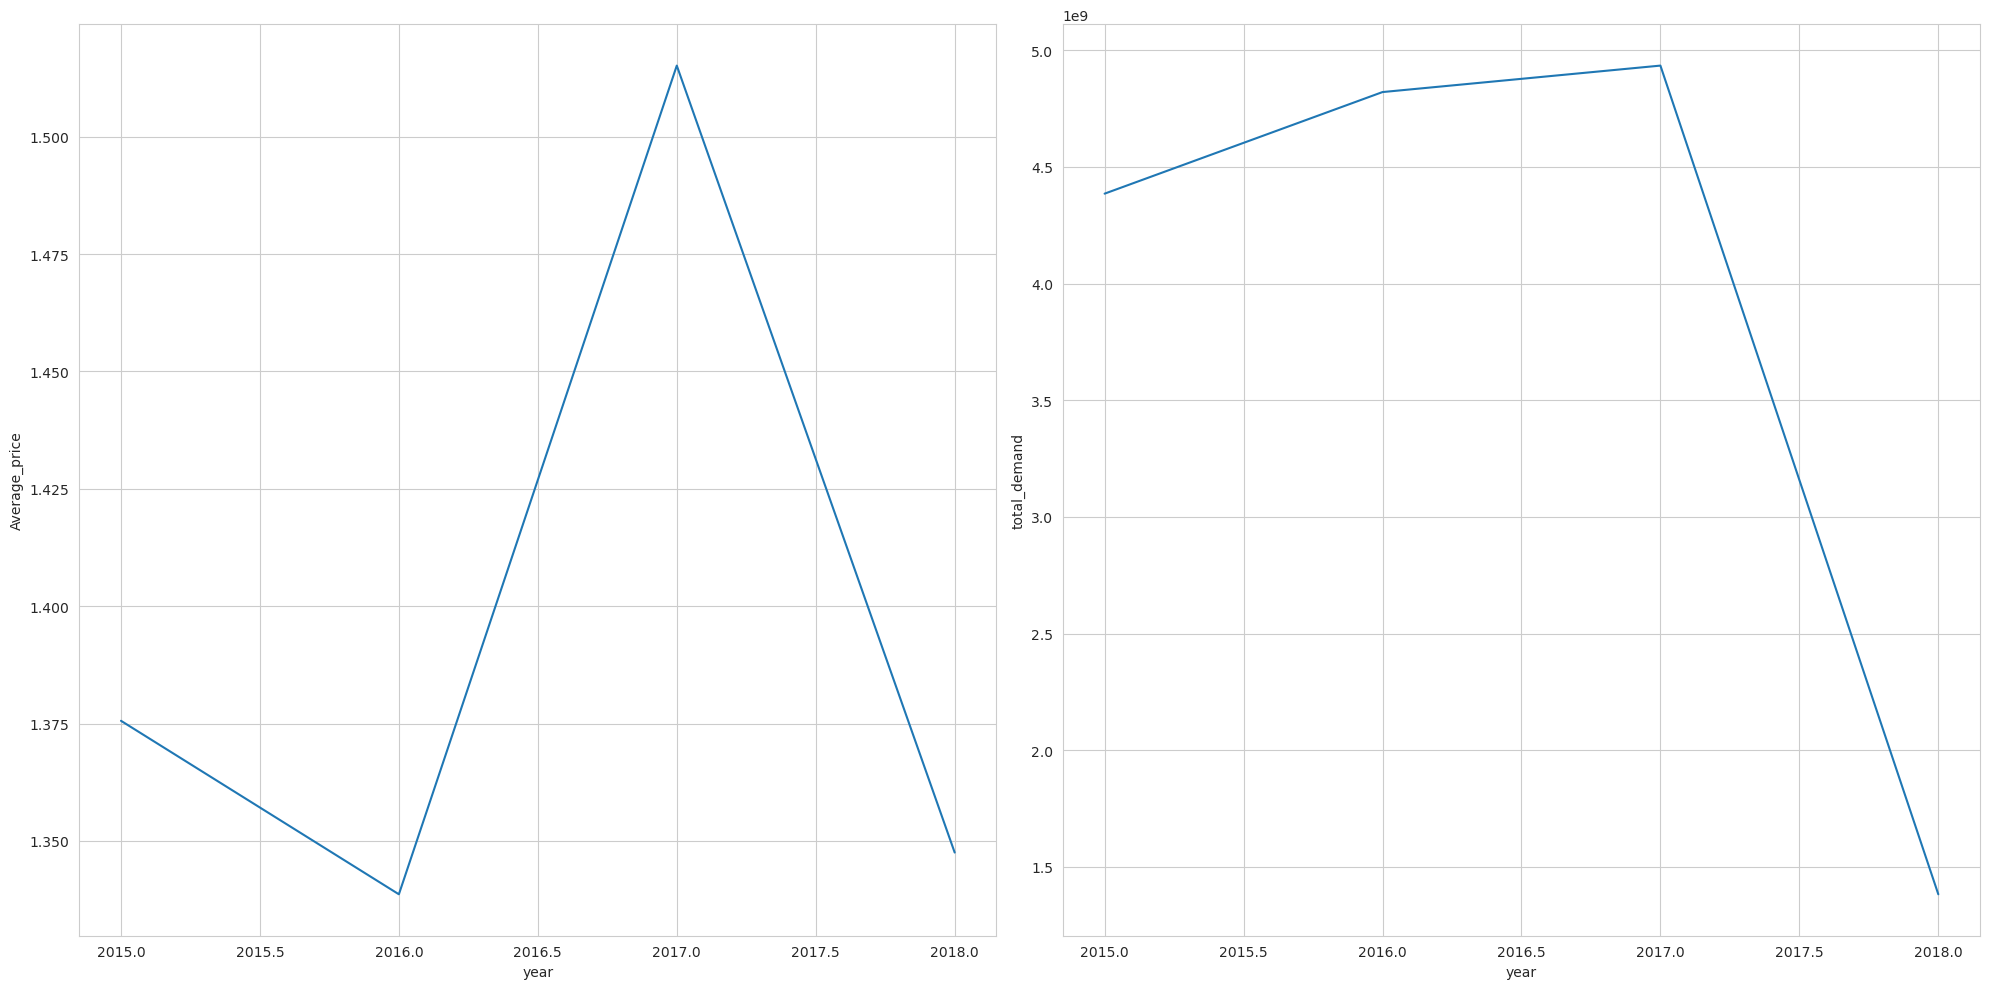

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

sns.lineplot(
    ax=axes[0],
    data=average_price_per_year,
    x='year',
    y='Average_price',
    markers=False,
    legend=True
)

sns.lineplot(
    ax=axes[1],
    data=demands_per_year,
    x='year',
    y='total_demand',
    markers=False,
    legend=True
)

plt.tight_layout()
plt.show()

### Change in avocado demand over the years

Looking at the trend over time, there is a noticeable decline in overall avocado demand. This suggests that people may have gradually started losing interest in avocados, or at least purchasing them less frequently during certain years.

However, this drop in demand does not necessarily mean that consumer preference alone changed. There could have been **external factors** influencing the market. For example, issues related to avocado production, supply shortages, or crop yield problems between 2017 and 2018 may have contributed to the sudden decline in total sales volume.

To understand whether price played a role, the average avocado price in 2017 was also examined. Even though the average price across all avocado categories was around **$2**, this does not appear high enough to fully explain the sharp drop in demand. This suggests that pricing alone was likely not the main reason behind the decline.

Overall, the change in demand seems to be driven by a combination of factors, possibly including supply-side limitations and broader market conditions, rather than a simple loss of consumer interest.

In [70]:
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14693,4,2016-11-27,2,9784,1014,2424,0,6346,6308,38,0,organic,2016,WestTexNewMexico
6546,29,2017-06-11,2,296174,11602,218428,135,66009,62895,6,3108,conventional,2017,HartfordSpringfield
11615,45,2015-02-15,2,4449,1630,2660,0,159,30,129,0,organic,2015,Spokane
1098,6,2015-11-15,1,247795,100856,106817,4615,35507,33636,1871,0,conventional,2015,LasVegas
9804,2,2015-12-13,2,5678,1495,2749,0,1434,197,1238,0,organic,2015,Detroit


In [90]:
per_year_per_region_demand = df.groupby(by=['year', 'region'], as_index=False).agg(
    total_demand=('Total Volume', 'sum'),
)

In [91]:
per_year_per_region_demand

,year,region,total_demand
0,2015,Albany,4029896
1,2015,Atlanta,23231698
2,2015,BaltimoreWashington,40645580
3,2015,Boise,3784357
4,2015,Boston,27454992
...,...,...,...
211,2018,Syracuse,1046988
212,2018,Tampa,6642055
213,2018,TotalUS,523632254
214,2018,West,92477085


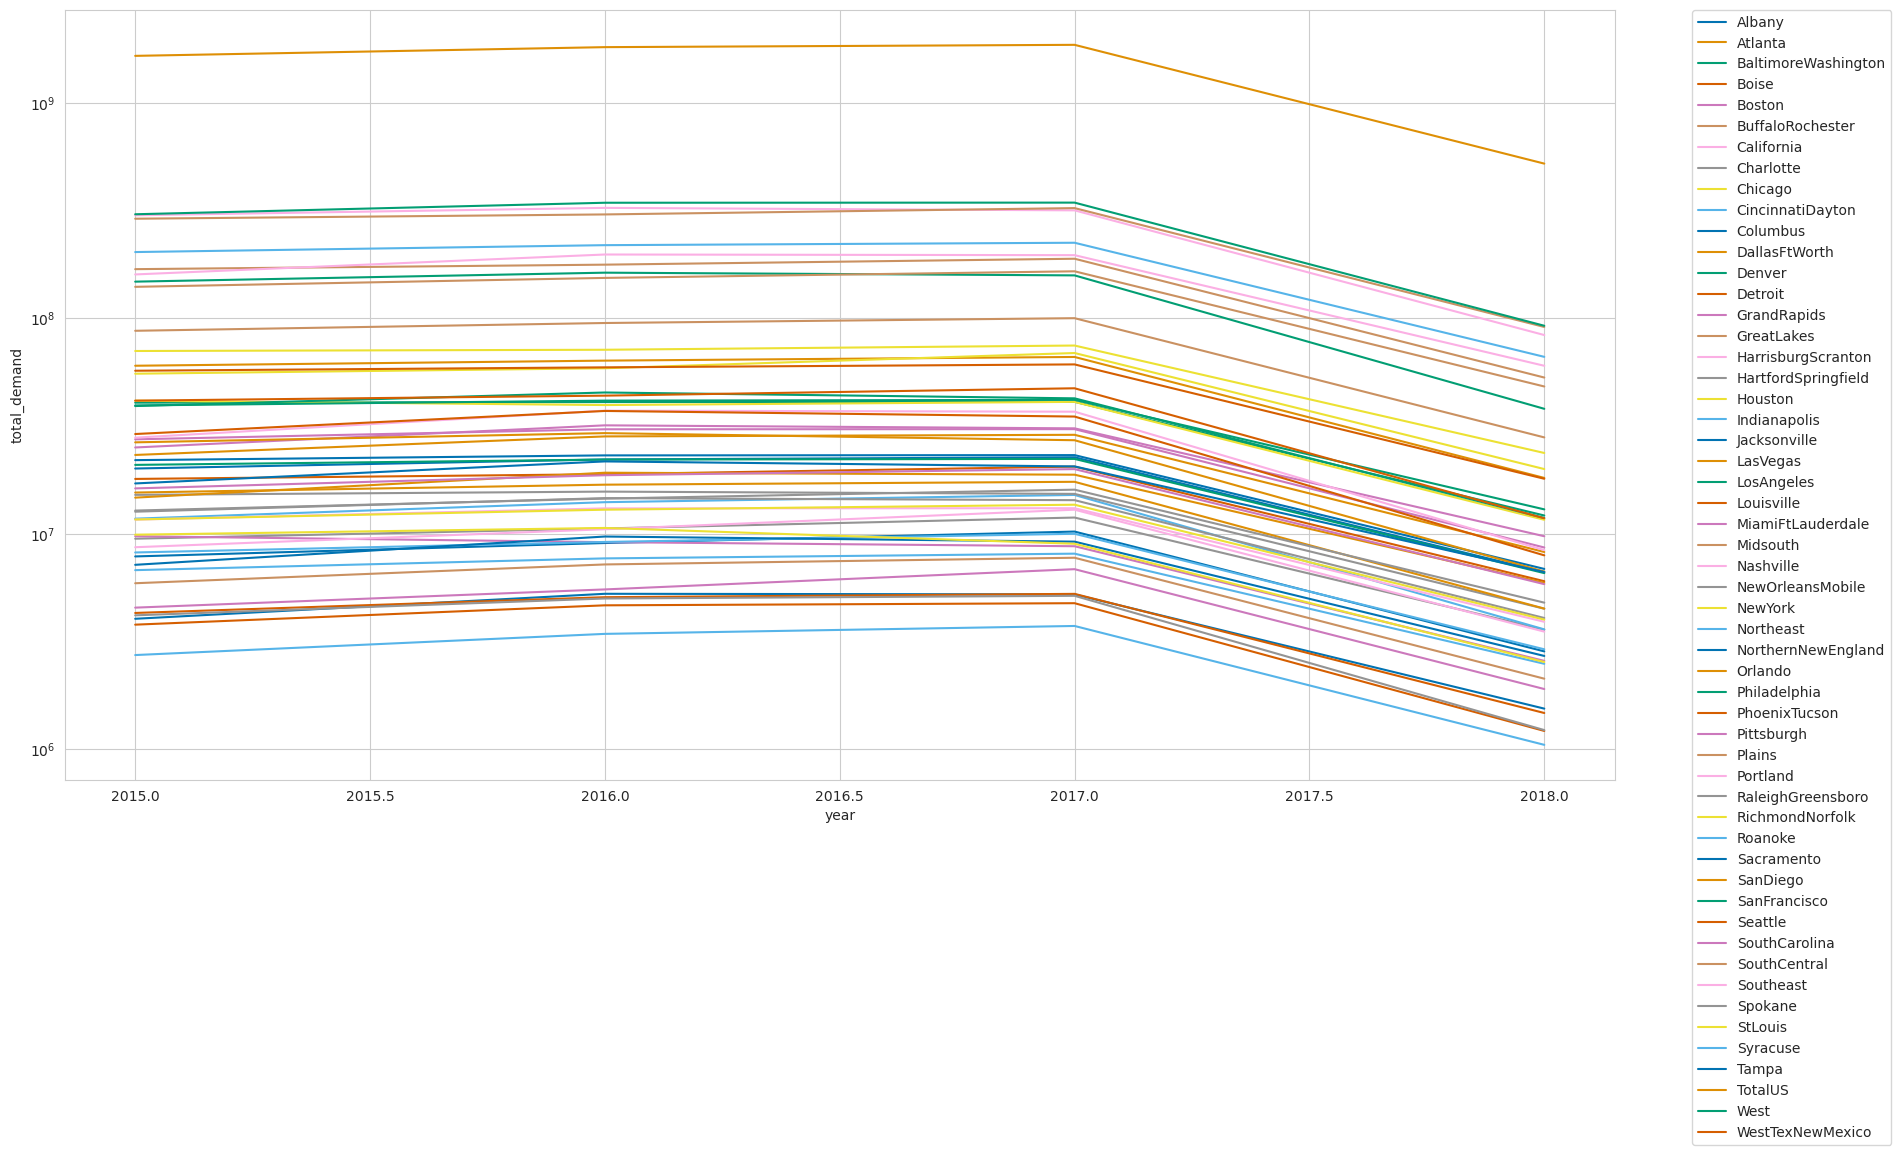

In [93]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = per_year_per_region_demand, x='year', y='total_demand', hue='region', palette='colorblind')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Decline in demand after 2017 across regions

After applying a log scale to account for large differences in demand across regions, a clear pattern emerges: **almost all regions show a noticeable decline in total avocado demand after 2017**.

What is important here is that this decline is **consistent across regions**, not limited to a single market or a few outliers. This suggests that the drop in demand is likely driven by broader factors affecting the overall market rather than region-specific issues.

The log scale helps confirm that this pattern is not caused by a few high-demand regions dominating the plot, but reflects a genuine downward trend visible even in smaller regions.


In [95]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1,64237,1037,54455,48,8697,8604,93,0,conventional,2015,Albany
1,1,2015-12-20,1,54877,674,44639,58,9506,9408,97,0,conventional,2015,Albany
2,2,2015-12-13,1,118220,795,109150,130,8145,8042,103,0,conventional,2015,Albany
3,3,2015-12-06,1,78992,1132,71976,73,5811,5677,134,0,conventional,2015,Albany
4,4,2015-11-29,1,51040,941,43838,76,6184,5986,198,0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,2,17075,2047,1529,0,13499,13067,432,0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,2,13888,1192,3432,0,9265,8940,325,0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,2,13767,1192,2453,728,9394,9352,42,0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,2,16205,1528,2981,727,10970,10920,50,0,organic,2018,WestTexNewMexico
